In [1]:
import pandas as pd
%pylab inline

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from string import letters

from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import numpy as np

%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

Populating the interactive namespace from numpy and matplotlib


In [2]:
rs = pd.read_csv("Reddit_test_1.csv")

In [3]:
rs

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Treated country data,(For U. S. redditors) In which state do you live?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
rs.columns

Index([u'Entry Id', u'Please indicate your gender.',
       u'Please select the category that includes your age.',
       u'What is your marital status?',
       u'What best describes your employment status?',
       u'Are you or have you ever been in military service?',
       u'Do you currently have children under the age of 18 living in your household?',
       u'What best describes your level of education?',
       u'Treated country data',
       u'(For U. S. redditors) In which state do you live?',
       u'Which one of the following ranges includes your total yearly household income before taxes?',
       u'treated subreddit data', u'Are you a dog or a cat person?',
       u'If you were a cheese, what cheese would you be?', u'Unnamed: 14',
       u'Unnamed: 15', u'Unnamed: 16', u'Unnamed: 17', u'Unnamed: 18',
       u'Unnamed: 19'],
      dtype='object')

In [5]:
rs.shape


(32754, 20)

# EDA 

In [6]:
del rs['Unnamed: 14']
del rs['Unnamed: 15']
del rs['Unnamed: 16']
del rs['Unnamed: 17']
del rs['Unnamed: 18']
del rs['Unnamed: 19']

In [7]:
rs = rs.rename(columns ={
        'Entry Id' : 'EntryId',
    'Please indicate your gender.': 'Gender',
     'Please select the category that includes your age.':'Age',   
    'What is your marital status?':'Mari_Status',
    'What best describes your employment status?':'Emp_Status',
    'Are you or have you ever been in military service?':'Military_Service',
    'Do you currently have children under the age of 18 living in your household?': 'Children_Under18',
    'What best describes your level of education?':'Education',
    'Treated country data':'Country',
    '(For U. S. redditors) In which state do you live?':'State',
    'Which one of the following ranges includes your total yearly household income before taxes?':'IncomeTaxes',
    'treated subreddit data':'Subreddit',
    'Are you a dog or a cat person?':'like_CatsOrDogs',
    'If you were a cheese, what cheese would you be?':'Cheese_You'
    })

In [8]:
rs.columns

Index([u'EntryId', u'Gender', u'Age', u'Mari_Status', u'Emp_Status',
       u'Military_Service', u'Children_Under18', u'Education', u'Country',
       u'State', u'IncomeTaxes', u'Subreddit', u'like_CatsOrDogs',
       u'Cheese_You'],
      dtype='object')

In [9]:
rs.Gender.value_counts()

Male      26418
Female     6135
None        201
Name: Gender, dtype: int64

In [10]:
rs[rs.Gender.isnull()]

,EntryId,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,State,IncomeTaxes,Subreddit,like_CatsOrDogs,Cheese_You


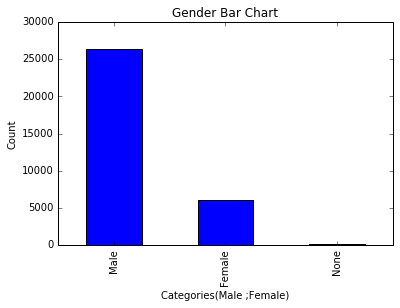

In [11]:
Gender_plot = rs.Gender.value_counts().plot(kind = 'bar' )
Gender_plot.set_title("Gender Bar Chart")
Gender_plot.set_xlabel("Categories(Male ;Female)")
Gender_plot.set_ylabel("Count")

In [12]:
rs.Age.value_counts()

18-24          15802
25-34          11575
Under 18        2330
35-44           2257
45-54            502
55-64            140
None              88
65 or Above       60
Name: Age, dtype: int64

In [13]:
rs.Age.describe()

count     32754
unique        8
top       18-24
freq      15802
Name: Age, dtype: object

In [14]:
rs[rs.Age.isnull()]

,EntryId,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,State,IncomeTaxes,Subreddit,like_CatsOrDogs,Cheese_You


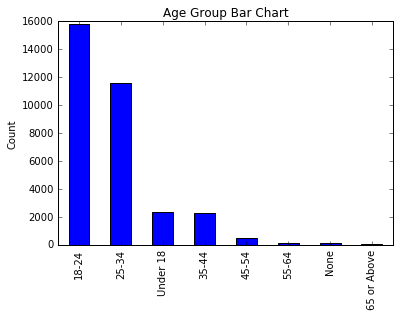

In [15]:
Age = rs.Age.value_counts().plot(kind = 'bar' )
Age.set_title("Age Group Bar Chart")
Age.set_xlabel("")
Age.set_ylabel("Count")

In [16]:
rs.Mari_Status.value_counts()

Single                                      10428
In a relationship                            9828
Forever Alone                                5850
Married/civil union/domestic partnership     5490
Engaged                                      1109
Widowed                                        44
Blank                                           5
Name: Mari_Status, dtype: int64

In [17]:
rs[rs.Mari_Status=="Blank"]

,EntryId,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,State,IncomeTaxes,Subreddit,like_CatsOrDogs,Cheese_You
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none


In [18]:
rs = rs[ -(rs.Mari_Status == 'Blank')] 

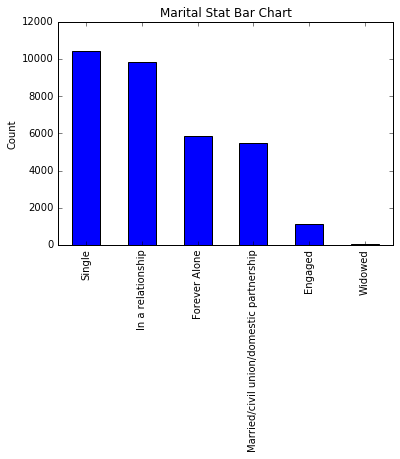

In [19]:
M_S = rs.Mari_Status.value_counts().plot(kind = 'bar' )
M_S.set_title("Marital Stat Bar Chart")
M_S.set_xlabel("")
M_S.set_ylabel("Count")

In [20]:
rs.Emp_Status.value_counts()

Employed full time                       14811
Student                                  12987
Not employed, but looking for work        2087
Freelance                                 1946
Not employed and not looking for work      682
None                                       151
Retired                                     85
Name: Emp_Status, dtype: int64

In [21]:
rs.Emp_Status.describe()

count                  32749
unique                     7
top       Employed full time
freq                   14811
Name: Emp_Status, dtype: object

In [22]:
rs[rs.Emp_Status.isnull()]

,EntryId,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,State,IncomeTaxes,Subreddit,like_CatsOrDogs,Cheese_You


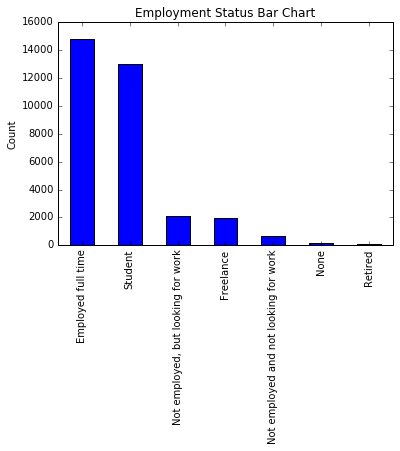

In [23]:
E_S = rs.Emp_Status.value_counts().plot(kind = 'bar' )
E_S.set_title("Employment Status Bar Chart")
E_S.set_xlabel("")
E_S.set_ylabel("Count")

In [24]:
rs.Military_Service.value_counts()

No     30526
Yes     2223
Name: Military_Service, dtype: int64

In [25]:
rs.Military_Service.describe()

count     32749
unique        2
top          No
freq      30526
Name: Military_Service, dtype: object

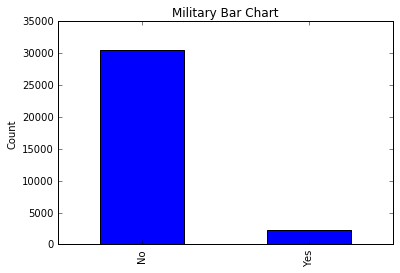

In [26]:
M_S = rs.Military_Service.value_counts().plot(kind = 'bar' )
M_S.set_title("Military Bar Chart")
M_S.set_xlabel("")
M_S.set_ylabel("Count")

In [27]:
rs[rs.Military_Service=="None"]

,EntryId,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,State,IncomeTaxes,Subreddit,like_CatsOrDogs,Cheese_You


In [28]:
rs.Children_Under18.value_counts()

No      27483
Yes      5047
None      219
Name: Children_Under18, dtype: int64

In [29]:
rs[rs.Children_Under18.isnull()]

,EntryId,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,State,IncomeTaxes,Subreddit,like_CatsOrDogs,Cheese_You


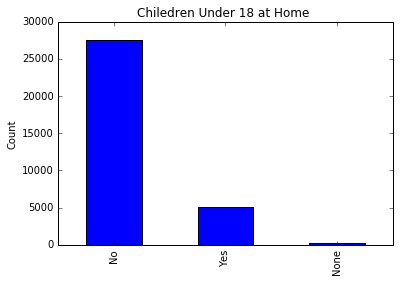

In [30]:
Children_Under18 = rs.Children_Under18.value_counts().plot(kind = 'bar' )
Children_Under18.set_title("Chiledren Under 18 at Home ")
Children_Under18.set_xlabel("")
Children_Under18.set_ylabel("Count")

In [31]:
rs[rs.Children_Under18=="None"]

,EntryId,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,State,IncomeTaxes,Subreddit,like_CatsOrDogs,Cheese_You
318,319,Male,35-44,In a relationship,Employed full time,Yes,None,Some college,United States,Minnesota,"$50,000 - $69,999",NaN,I like cats.,Goat
552,553,Male,18-24,Single,Student,No,None,Bachelor's degree,United States,Massachusetts,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American
675,676,None,None,Forever Alone,None,Yes,None,None,United States,Arizona,none,NaN,I like dogs.,Cheddar
1043,1044,Male,18-24,In a relationship,Student,No,None,Some college,Canada,NaN,"Under $20,000",rowing,I like cats.,Cheddar
1145,1146,Male,Under 18,In a relationship,Student,No,None,Some high school,United States,Arkansas,"$40,000 - $49,999",fffffffuuuuuuuuuuuu,I like dogs.,Provolone
1203,1204,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,None,Graduate or professional degree,Italy,NaN,"$20,000 - $29,999",truereddit,I like dogs.,Other
1385,1386,Male,18-24,Single,Student,No,None,High school graduate or equivalent,United States,New York,"$70,000 - $99,999",askreddit,I like dogs.,Other
1493,1494,Male,25-34,In a relationship,Employed full time,No,None,Bachelor's degree,france,NaN,"$40,000 - $49,999",iama,I like cats.,Other
1565,1566,None,None,Forever Alone,None,Yes,None,None,none,NaN,"$70,000 - $99,999","tf2, ireland",I like dogs.,Goat
1616,1617,Male,18-24,In a relationship,Employed full time,No,None,Graduate or professional degree,United States,California,"$30,000 - $39,999",NaN,I like turtles.,Brie


In [32]:
rs.Education.value_counts()

Bachelor's degree                     11042
Some college                           9599
Graduate or professional degree        4722
High school graduate or equivalent     3272
Some high school                       1924
Associate degree                       1411
Trade or Vocational degree              635
None                                    144
Name: Education, dtype: int64

In [33]:
rs.Education.describe()

count                 32749
unique                    8
top       Bachelor's degree
freq                  11042
Name: Education, dtype: object

In [34]:
rs[rs.Education.isnull()]

,EntryId,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,State,IncomeTaxes,Subreddit,like_CatsOrDogs,Cheese_You


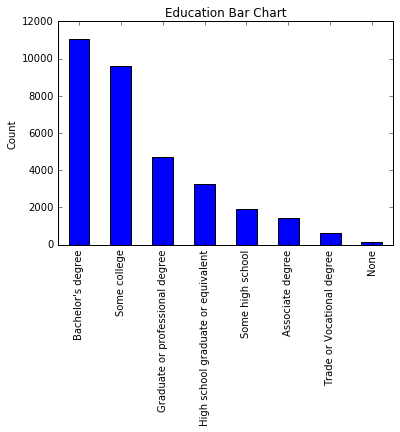

In [35]:
Education = rs.Education.value_counts().plot(kind = 'bar' )
Education.set_title("Education Bar Chart")
Education.set_xlabel("")
Education.set_ylabel("Count")

In [36]:
rs.Country.describe()

count             32749
unique              440
top       United States
freq              20962
Name: Country, dtype: object

In [37]:
rs.Country.value_counts()

United States                       20962
Canada                               2888
United Kingdom                       1782
Australia                            1051
Germany                               407
New Zealand                           315
Sweden                                309
Norway                                288
Ireland                               242
Finland                               188
Denmark                               182
none                                  177
India                                 154
France                                142
The Netherlands                       141
Netherlands                           134
Belgium                               119
Poland                                112
Brazil                                111
Mexico                                108
Spain                                 100
canada                                 97
Portugal                               87
Switzerland                       

In [38]:
rs[rs.Country.isnull()]

,EntryId,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,State,IncomeTaxes,Subreddit,like_CatsOrDogs,Cheese_You


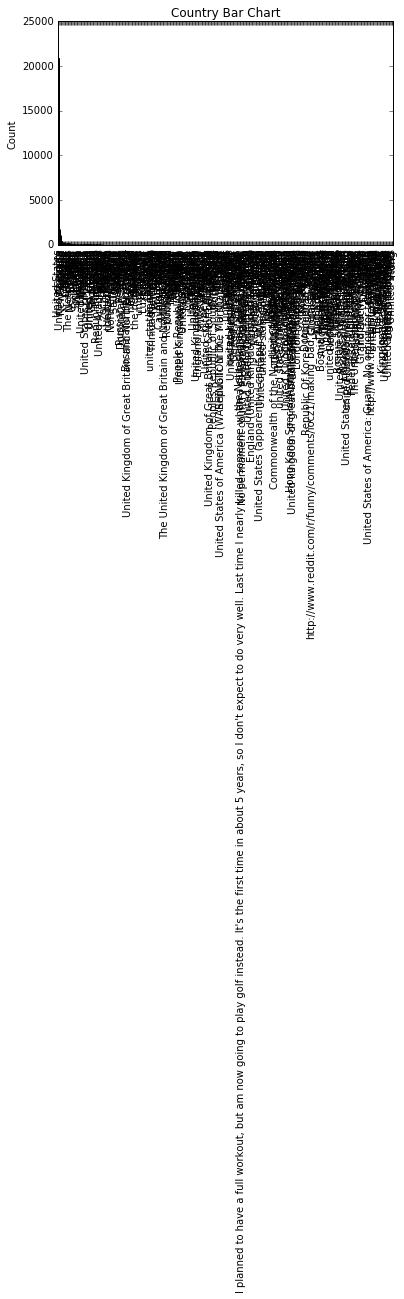

In [39]:
Country = rs.Country.value_counts().plot(kind = 'bar' )
Country.set_title("Country Bar Chart")
Country.set_xlabel("")
Country.set_ylabel("Count")

In [40]:
rs.IncomeTaxes.value_counts()

Under $20,000          7891
$50,000 - $69,999      4133
$70,000 - $99,999      4100
$100,000 - $149,999    3522
$20,000 - $29,999      3206
$30,000 - $39,999      2904
$150,000 or more       2692
$40,000 - $49,999      2686
none                   1615
Name: IncomeTaxes, dtype: int64

In [41]:
rs.IncomeTaxes.describe()

count             32749
unique                9
top       Under $20,000
freq               7891
Name: IncomeTaxes, dtype: object

In [42]:
rs[rs.IncomeTaxes.isnull()]

,EntryId,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,State,IncomeTaxes,Subreddit,like_CatsOrDogs,Cheese_You


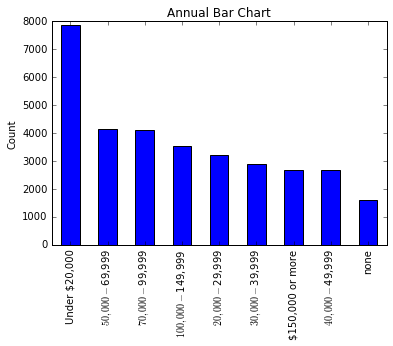

In [43]:
IncomeTaxes=rs.IncomeTaxes.value_counts().plot(kind = 'bar' )
IncomeTaxes.set_title("Annual Bar Chart")
IncomeTaxes.set_xlabel("")
IncomeTaxes.set_ylabel("Count")

In [44]:
rs.Subreddit.value_counts()

askreddit                                        2123
fffffffuuuuuuuuuuuu                              1746
pics                                             1651
trees                                            1311
gaming                                           1206
funny                                            1092
atheism                                           839
askscience                                        779
all                                               647
todayilearned                                     645
starcraft                                         611
iama                                              576
minecraft                                         520
f7u12                                             515
programming                                       501
twoxchromosomes                                   396
science                                           378
truereddit                                        347
wtf                         

In [45]:
del rs["Subreddit"]
del rs['EntryId']

In [46]:
rs.like_CatsOrDogs.value_counts()

I like dogs.       17149
I like cats.       11152
I like turtles.     4442
askreddit              2
 Reddit.com            1
movies                 1
Name: like_CatsOrDogs, dtype: int64

In [47]:
rs.like_CatsOrDogs.describe()

count            32747
unique               6
top       I like dogs.
freq             17149
Name: like_CatsOrDogs, dtype: object

In [48]:
rs.loc[rs['like_CatsOrDogs'] == 'I like turtles.', 'like_CatsOrDogs'] = 'none'
rs.loc[rs['like_CatsOrDogs'] == 'askreddit.', 'like_CatsOrDogs'] = 'none'
rs.loc[rs['like_CatsOrDogs'] == 'askreddit', 'like_CatsOrDogs'] = 'none'
rs.loc[rs['like_CatsOrDogs'] == ' Reddit.com', 'like_CatsOrDogs'] = 'none'
rs.loc[rs['like_CatsOrDogs'] == 'movies', 'like_CatsOrDogs'] = 'none'

In [49]:
rs.like_CatsOrDogs.value_counts()

I like dogs.    17149
I like cats.    11152
none             4446
Name: like_CatsOrDogs, dtype: int64

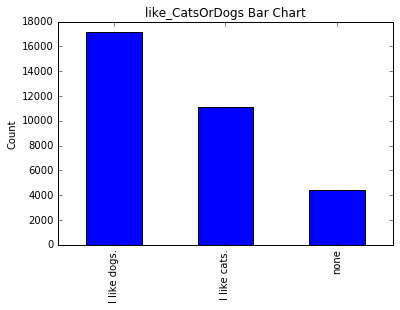

In [50]:
 like_CatsOrDogs=rs.like_CatsOrDogs.value_counts().plot(kind = 'bar' )
like_CatsOrDogs.set_title("like_CatsOrDogs Bar Chart")
like_CatsOrDogs.set_xlabel("")
like_CatsOrDogs.set_ylabel("Count")

In [51]:
rs.Cheese_You.value_counts()

Other            6562
Cheddar          6101
Brie             3742
Provolone        3454
Swiss            3214
Feta             2991
Goat             2516
Munster          1770
American         1438
Paneer            618
Limburger         337
 f7u12              2
 Pics               1
 awww               1
1                   1
programming')       1
Name: Cheese_You, dtype: int64

In [52]:
rs.Cheese_You.describe()

count     32749
unique       16
top       Other
freq       6562
Name: Cheese_You, dtype: object

In [53]:
rs.Cheese_You.value_counts()

Other            6562
Cheddar          6101
Brie             3742
Provolone        3454
Swiss            3214
Feta             2991
Goat             2516
Munster          1770
American         1438
Paneer            618
Limburger         337
 f7u12              2
 Pics               1
 awww               1
1                   1
programming')       1
Name: Cheese_You, dtype: int64

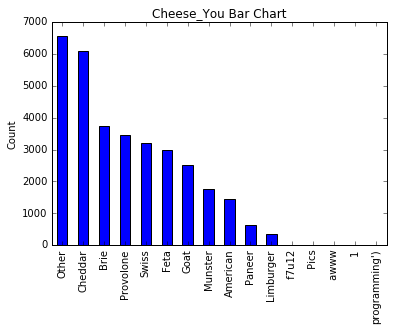

In [54]:
Cheese_You=rs.Cheese_You.value_counts().plot(kind = 'bar' )
Cheese_You.set_title("Cheese_You Bar Chart")
Cheese_You.set_xlabel("")
Cheese_You.set_ylabel("Count")

Aggregate the Countries

In [55]:
SOUTH_AMERICA = [
'Argentina',
'Bolivia',
'Brazil',
'Chile',
'Colombia',
'Ecuador',
'Guyana',
'Paraguay',
'Peru',
'Suriname',
'Uruguay',
'Venezuela']


OCEANIA = [
'Australia',
'Fiji',
'Kiribati',
'Marshall Islands',
'Micronesia',
'Nauru',
'New Zealand',
'Palau',
'Papua New Guinea',
'Samoa',
'Solomon Islands',
'Tonga',
'Tuvalu',
'Vanuatu']

NORTH_AMERICA= [
'Antigua and Barbuda',
'Bahamas',
'Barbados',
'Belize',
'Canada',
'Costa Rica',
'Cuba',
'Dominica',
'Dominican Republic',
'El Salvador',
'Grenada',
'Guatemala',
'Haiti',
'Honduras',
'Jamaica',
'Mexico',
'Nicaragua',
'Ohio',
'Panama',
'Saint Kitts and Nevis',
'Saint Lucia',
'Saint Vincent and the Grenadines',
'Trinidad and Tobago',
'United States']

EUROPE=[
'Albania',
'Andorra',
'Armenia',
'Austria',
'Azerbaijan',
'Belarus',
'Belgium',
'Bosnia and Herzegovina',
'Bulgaria',
'Croatia',
'Cyprus',
'Czech Republic',
'Denmark',
'Estonia',
'Finland',
'France',
'Georgia',
'Germany',
'Greece',
'Hungary',
'Iceland',
'Ireland',
'Italy',
'Latvia',
'Liechtenstein',
'Lithuania',
'Luxembourg',
'Macedonia',
'Malta',
'Moldova',
'Monaco',
'Montenegro',
'Netherlands',
'Norway',
'Poland',
'Portugal',
'Romania',
'San Marino',
'Serbia',
'Slovakia',
'Slovenia',
'Spain',
'Sweden',
'Switzerland',
'Ukraine',
'United Kingdom',
'Vatican City']


ASIA=[
'Afghanistan',
'Bahrain',
'Bangladesh',
'Bhutan',
'Brunei',
'Burma (Myanmar)',
'Cambodia',
'China',
'East Timor',
'India',
'Indonesia',
'Iran',
'Iraq',
'Israel',
'Japan',
'Jordan',
'Kazakhstan',
'Korea, North',
'Korea, South',
'Kuwait',
'Kyrgyzstan',
'Laos',
'Lebanon',
'Malaysia',
'Maldives',
'Mongolia',
'Nepal',
'Oman'
'Pakistan',
'Philippines',
'Qatar',
'Russian Federation',
'Saudi Arabia',
'Singapore',
'Sri Lanka',
'Syria',
'Tajikistan',
'Thailand',
'Turkey',
'Turkmenistan',
'United Arab Emirates',
'Uzbekistan',
'Vietnam',
'Yemen']

AFRICA=[
'Algeria',
'Angola',
'Benin',
'Botswana',
'Burkina',
'Burundi',
'Cameroon',
'Cape Verde',
'Central African Republic',
'Chad',
'Comoros',
'Congo',
'Congo, Democratic Republic of',
'Djibouti',
'Egypt',
'Equatorial Guinea',
'Eritrea',
'Ethiopia',
'Gabon',
'Gambia',
'Ghana',
'Guinea',
'Guinea-Bissau',
'Ivory Coast',
'Kenya',
'Lesotho',
'Liberia',
'Libya',
'Madagascar',
'Malawi',
'Mali',
'Mauritania',
'Mauritius',
'Morocco',
'Mozambique',
'Namibia',
'Niger',
'Nigeria',
'Rwanda',
'Sao Tome and Principe',
'Senegal',
'Seychelles',
'Sierra Leone',
'Somalia',
'South Africa',
'South Sudan',
'Sudan',
'Swaziland',
'Tanzania',
'Togo',
'Tunisia',
'Uganda',
'Zambia',
'Zimbabwe']

In [56]:
[x.upper() for x in SOUTH_AMERICA]

['ARGENTINA',
 'BOLIVIA',
 'BRAZIL',
 'CHILE',
 'COLOMBIA',
 'ECUADOR',
 'GUYANA',
 'PARAGUAY',
 'PERU',
 'SURINAME',
 'URUGUAY',
 'VENEZUELA']

In [57]:
[x.upper() for x in NORTH_AMERICA]

['ANTIGUA AND BARBUDA',
 'BAHAMAS',
 'BARBADOS',
 'BELIZE',
 'CANADA',
 'COSTA RICA',
 'CUBA',
 'DOMINICA',
 'DOMINICAN REPUBLIC',
 'EL SALVADOR',
 'GRENADA',
 'GUATEMALA',
 'HAITI',
 'HONDURAS',
 'JAMAICA',
 'MEXICO',
 'NICARAGUA',
 'OHIO',
 'PANAMA',
 'SAINT KITTS AND NEVIS',
 'SAINT LUCIA',
 'SAINT VINCENT AND THE GRENADINES',
 'TRINIDAD AND TOBAGO',
 'UNITED STATES']

In [58]:
[x.upper() for x in AFRICA]

['ALGERIA',
 'ANGOLA',
 'BENIN',
 'BOTSWANA',
 'BURKINA',
 'BURUNDI',
 'CAMEROON',
 'CAPE VERDE',
 'CENTRAL AFRICAN REPUBLIC',
 'CHAD',
 'COMOROS',
 'CONGO',
 'CONGO, DEMOCRATIC REPUBLIC OF',
 'DJIBOUTI',
 'EGYPT',
 'EQUATORIAL GUINEA',
 'ERITREA',
 'ETHIOPIA',
 'GABON',
 'GAMBIA',
 'GHANA',
 'GUINEA',
 'GUINEA-BISSAU',
 'IVORY COAST',
 'KENYA',
 'LESOTHO',
 'LIBERIA',
 'LIBYA',
 'MADAGASCAR',
 'MALAWI',
 'MALI',
 'MAURITANIA',
 'MAURITIUS',
 'MOROCCO',
 'MOZAMBIQUE',
 'NAMIBIA',
 'NIGER',
 'NIGERIA',
 'RWANDA',
 'SAO TOME AND PRINCIPE',
 'SENEGAL',
 'SEYCHELLES',
 'SIERRA LEONE',
 'SOMALIA',
 'SOUTH AFRICA',
 'SOUTH SUDAN',
 'SUDAN',
 'SWAZILAND',
 'TANZANIA',
 'TOGO',
 'TUNISIA',
 'UGANDA',
 'ZAMBIA',
 'ZIMBABWE']

In [59]:
[x.upper() for x in EUROPE]

['ALBANIA',
 'ANDORRA',
 'ARMENIA',
 'AUSTRIA',
 'AZERBAIJAN',
 'BELARUS',
 'BELGIUM',
 'BOSNIA AND HERZEGOVINA',
 'BULGARIA',
 'CROATIA',
 'CYPRUS',
 'CZECH REPUBLIC',
 'DENMARK',
 'ESTONIA',
 'FINLAND',
 'FRANCE',
 'GEORGIA',
 'GERMANY',
 'GREECE',
 'HUNGARY',
 'ICELAND',
 'IRELAND',
 'ITALY',
 'LATVIA',
 'LIECHTENSTEIN',
 'LITHUANIA',
 'LUXEMBOURG',
 'MACEDONIA',
 'MALTA',
 'MOLDOVA',
 'MONACO',
 'MONTENEGRO',
 'NETHERLANDS',
 'NORWAY',
 'POLAND',
 'PORTUGAL',
 'ROMANIA',
 'SAN MARINO',
 'SERBIA',
 'SLOVAKIA',
 'SLOVENIA',
 'SPAIN',
 'SWEDEN',
 'SWITZERLAND',
 'UKRAINE',
 'UNITED KINGDOM',
 'VATICAN CITY']

In [60]:
[x.upper() for x in ASIA]

['AFGHANISTAN',
 'BAHRAIN',
 'BANGLADESH',
 'BHUTAN',
 'BRUNEI',
 'BURMA (MYANMAR)',
 'CAMBODIA',
 'CHINA',
 'EAST TIMOR',
 'INDIA',
 'INDONESIA',
 'IRAN',
 'IRAQ',
 'ISRAEL',
 'JAPAN',
 'JORDAN',
 'KAZAKHSTAN',
 'KOREA, NORTH',
 'KOREA, SOUTH',
 'KUWAIT',
 'KYRGYZSTAN',
 'LAOS',
 'LEBANON',
 'MALAYSIA',
 'MALDIVES',
 'MONGOLIA',
 'NEPAL',
 'OMANPAKISTAN',
 'PHILIPPINES',
 'QATAR',
 'RUSSIAN FEDERATION',
 'SAUDI ARABIA',
 'SINGAPORE',
 'SRI LANKA',
 'SYRIA',
 'TAJIKISTAN',
 'THAILAND',
 'TURKEY',
 'TURKMENISTAN',
 'UNITED ARAB EMIRATES',
 'UZBEKISTAN',
 'VIETNAM',
 'YEMEN']

In [61]:
[x.upper() for x in OCEANIA]

['AUSTRALIA',
 'FIJI',
 'KIRIBATI',
 'MARSHALL ISLANDS',
 'MICRONESIA',
 'NAURU',
 'NEW ZEALAND',
 'PALAU',
 'PAPUA NEW GUINEA',
 'SAMOA',
 'SOLOMON ISLANDS',
 'TONGA',
 'TUVALU',
 'VANUATU']

In [62]:
SOUTH_AMERICA =['ARGENTINA',
 'BOLIVIA',
 'BRAZIL',
 'CHILE',
 'COLOMBIA',
 'ECUADOR',
 'GUYANA',
 'PARAGUAY',
 'PERU',
 'SURINAME',
 'URUGUAY',
 'VENEZUELA']


NORTH_AMERICA=['ANTIGUA AND BARBUDA',
 'BAHAMAS',
 'BARBADOS',
 'BELIZE',
 'CANADA',
 'COSTA RICA',
 'CUBA',
 'DOMINICA',
 'DOMINICAN REPUBLIC',
 'EL SALVADOR',
 'GRENADA',
 'GUATEMALA',
 'HAITI',
 'HONDURAS',
 'JAMAICA',
 'MEXICO',
 'NICARAGUA',
 'OHIO'             
 'PANAMA',
 'SAINT KITTS AND NEVIS',
 'SAINT LUCIA',
 'SAINT VINCENT AND THE GRENADINES',
 'TRINIDAD AND TOBAGO',
 'UNITED STATES']


AFRICA=['ALGERIA',
 'ANGOLA',
 'BENIN',
 'BOTSWANA',
 'BURKINA',
 'BURUNDI',
 'CAMEROON',
 'CAPE VERDE',
 'CENTRAL AFRICAN REPUBLIC',
 'CHAD',
 'COMOROS',
 'CONGO',
 'CONGO, DEMOCRATIC REPUBLIC OF',
 'DJIBOUTI',
 'EGYPT',
 'EQUATORIAL GUINEA',
 'ERITREA',
 'ETHIOPIA',
 'GABON',
 'GAMBIA',
 'GHANA',
 'GUINEA',
 'GUINEA-BISSAU',
 'IVORY COAST',
 'KENYA',
 'LESOTHO',
 'LIBERIA',
 'LIBYA',
 'MADAGASCAR',
 'MALAWI',
 'MALI',
 'MAURITANIA',
 'MAURITIUS',
 'MOROCCO',
 'MOZAMBIQUE',
 'NAMIBIA',
 'NIGER',
 'NIGERIA',
 'RWANDA',
 'SAO TOME AND PRINCIPE',
 'SENEGAL',
 'SEYCHELLES',
 'SIERRA LEONE',
 'SOMALIA',
 'SOUTH AFRICA',
 'SOUTH SUDAN',
 'SUDAN',
 'SWAZILAND',
 'TANZANIA',
 'TOGO',
 'TUNISIA',
 'UGANDA',
 'ZAMBIA',
 'ZIMBABWE']


EUROPE=['ALBANIA',
 'ANDORRA',
 'ARMENIA',
 'AUSTRIA',
 'AZERBAIJAN',
 'BELARUS',
 'BELGIUM',
 'BOSNIA AND HERZEGOVINA',
 'BULGARIA',
 'CROATIA',
 'CYPRUS',
 'CZECH REPUBLIC',
 'DENMARK',
 'ESTONIA',
 'FINLAND',
 'FRANCE',
 'GEORGIA',
 'GERMANY',
 'GREECE',
 'HUNGARY',
 'ICELAND',
 'IRELAND',
 'ITALY',
 'LATVIA',
 'LIECHTENSTEIN',
 'LITHUANIA',
 'LUXEMBOURG',
 'MACEDONIA',
 'MALTA',
 'MOLDOVA',
 'MONACO',
 'MONTENEGRO',
 'NETHERLANDS',
 'NORWAY',
 'POLAND',
 'PORTUGAL',
 'ROMANIA',
 'SAN MARINO',
 'SERBIA',
 'SLOVAKIA',
 'SLOVENIA',
 'SPAIN',
 'SWEDEN',
 'SWITZERLAND',
 'UKRAINE',
 'UNITED KINGDOM',
 'VATICAN CITY']


ASIA=['AFGHANISTAN',
 'BAHRAIN',
 'BANGLADESH',
 'BHUTAN',
 'BRUNEI',
 'BURMA (MYANMAR)',
 'CAMBODIA',
 'CHINA',
 'EAST TIMOR',
 'INDIA',
 'INDONESIA',
 'IRAN',
 'IRAQ',
 'ISRAEL',
 'JAPAN',
 'JORDAN',
 'KAZAKHSTAN',
 'KOREA, NORTH',
 'KOREA, SOUTH',
 'KUWAIT',
 'KYRGYZSTAN',
 'LAOS',
 'LEBANON',
 'MALAYSIA',
 'MALDIVES',
 'MONGOLIA',
 'NEPAL',
 'OMANPAKISTAN',
 'PHILIPPINES',
 'QATAR',
 'RUSSIAN FEDERATION',
 'SAUDI ARABIA',
 'SINGAPORE',
 'SRI LANKA',
 'SYRIA',
 'TAJIKISTAN',
 'THAILAND',
 'TURKEY',
 'TURKMENISTAN',
 'UNITED ARAB EMIRATES',
 'UZBEKISTAN',
 'VIETNAM',
 'YEMEN']


OCEANIA=['AUSTRALIA',
 'FIJI',
 'KIRIBATI',
 'MARSHALL ISLANDS',
 'MICRONESIA',
 'NAURU',
 'NEW ZEALAND',
 'PALAU',
 'PAPUA NEW GUINEA',
 'SAMOA',
 'SOLOMON ISLANDS',
 'TONGA',
 'TUVALU',
 'VANUATU']

In [63]:
rs['Country'] = map(lambda x: x.upper(), rs['Country'])

In [64]:
Continent = []
NoContinent=[]

for i in rs['Country']:
    continent=''
    if(i in EUROPE):
        continent="Europe"
        Continent.append(continent)
    elif(i in NORTH_AMERICA ):
        continent="North America"
        Continent.append(continent)
    elif(i in SOUTH_AMERICA ):
        continent="South America"
        Continent.append(continent)
    elif(i in ASIA ):
        continent="Asia"
        Continent.append(continent)
        
    elif(i in AFRICA ):
        continent="Africa"
        Continent.append(continent)
        
    elif(i in OCEANIA ):
        continent="Oceania"
        Continent.append(continent)
    elif(i=='NONE' ):
        continent="NONE"
        Continent.append(continent)
        
    else:
        continent="Unknown"
        Continent.append(continent)
        NoContinent.append(i)

In [65]:
rs['Continent']=Continent

In [66]:
rs

,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,State,IncomeTaxes,like_CatsOrDogs,Cheese_You,Continent
5,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,UNITED STATES,New York,"$150,000 or more",I like dogs.,Cheddar,North America
6,Male,25-34,In a relationship,Employed full time,No,No,Some college,GERMANY,NaN,none,I like dogs.,Cheddar,Europe
7,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,UNITED STATES,California,"$70,000 - $99,999",I like dogs.,American,North America
8,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,UNITED STATES,New York,"$150,000 or more",I like cats.,Provolone,North America
9,Male,25-34,In a relationship,Freelance,No,No,Some college,GERMANY,NaN,"$70,000 - $99,999",I like cats.,Munster,Europe
10,Male,18-24,Forever Alone,Not employed and not looking for work,No,No,High school graduate or equivalent,UNITED STATES,Oregon,"Under $20,000",I like dogs.,Cheddar,North America
11,Male,18-24,In a relationship,Employed full time,No,No,Bachelor's degree,UNITED STATES,Michigan,"$40,000 - $49,999",I like dogs.,Swiss,North America
12,Male,25-34,Forever Alone,Employed full time,No,No,Bachelor's degree,UNITED STATES,New York,"$50,000 - $69,999",none,Provolone,North America
13,Male,18-24,Forever Alone,Student,No,No,Some college,ROMANIA,NaN,"Under $20,000",I like cats.,Swiss,Europe
14,Male,25-34,In a relationship,Employed full time,No,No,Bachelor's degree,UNITED STATES,Wisconsin,"$50,000 - $69,999",I like dogs.,Provolone,North America


In [67]:
rs[rs['Continent']=='None']

rs[rs['Country']=="NONE"]

,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,State,IncomeTaxes,like_CatsOrDogs,Cheese_You,Continent
401,Female,18-24,In a relationship,Employed full time,No,No,Some college,NONE,NaN,"$20,000 - $29,999",I like cats.,Other,NONE
911,Male,18-24,In a relationship,Student,No,No,Some college,NONE,NaN,"$30,000 - $39,999",none,Goat,NONE
1045,Male,18-24,In a relationship,Student,No,Yes,Bachelor's degree,NONE,NaN,none,I like dogs.,Munster,NONE
1103,Male,Under 18,Single,Student,No,No,Some high school,NONE,NaN,none,I like dogs.,Munster,NONE
1187,Male,25-34,Single,Student,No,No,Bachelor's degree,NONE,NaN,"Under $20,000",I like dogs.,Munster,NONE
1565,None,None,Forever Alone,None,Yes,None,None,NONE,NaN,"$70,000 - $99,999",I like dogs.,Goat,NONE
2164,Male,18-24,Forever Alone,Employed full time,No,No,High school graduate or equivalent,NONE,NaN,"$40,000 - $49,999",I like cats.,Other,NONE
2337,Male,25-34,In a relationship,Employed full time,No,No,Some college,NONE,NaN,none,I like dogs.,Munster,NONE
3125,None,25-34,In a relationship,None,No,No,Bachelor's degree,NONE,NaN,"$70,000 - $99,999",I like dogs.,Cheddar,NONE
3350,Male,18-24,Single,Student,No,No,Bachelor's degree,NONE,NaN,"Under $20,000",none,Swiss,NONE


In [68]:
rs

,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,State,IncomeTaxes,like_CatsOrDogs,Cheese_You,Continent
5,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,UNITED STATES,New York,"$150,000 or more",I like dogs.,Cheddar,North America
6,Male,25-34,In a relationship,Employed full time,No,No,Some college,GERMANY,NaN,none,I like dogs.,Cheddar,Europe
7,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,UNITED STATES,California,"$70,000 - $99,999",I like dogs.,American,North America
8,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,UNITED STATES,New York,"$150,000 or more",I like cats.,Provolone,North America
9,Male,25-34,In a relationship,Freelance,No,No,Some college,GERMANY,NaN,"$70,000 - $99,999",I like cats.,Munster,Europe
10,Male,18-24,Forever Alone,Not employed and not looking for work,No,No,High school graduate or equivalent,UNITED STATES,Oregon,"Under $20,000",I like dogs.,Cheddar,North America
11,Male,18-24,In a relationship,Employed full time,No,No,Bachelor's degree,UNITED STATES,Michigan,"$40,000 - $49,999",I like dogs.,Swiss,North America
12,Male,25-34,Forever Alone,Employed full time,No,No,Bachelor's degree,UNITED STATES,New York,"$50,000 - $69,999",none,Provolone,North America
13,Male,18-24,Forever Alone,Student,No,No,Some college,ROMANIA,NaN,"Under $20,000",I like cats.,Swiss,Europe
14,Male,25-34,In a relationship,Employed full time,No,No,Bachelor's degree,UNITED STATES,Wisconsin,"$50,000 - $69,999",I like dogs.,Provolone,North America


In [69]:
rs.Continent.value_counts()

North America    24150
Europe            4942
Oceania           1405
Unknown            949
Asia               731
South America      276
NONE               177
Africa             119
Name: Continent, dtype: int64

In [70]:
rs.Continent.describe()

count             32749
unique                8
top       North America
freq              24150
Name: Continent, dtype: object

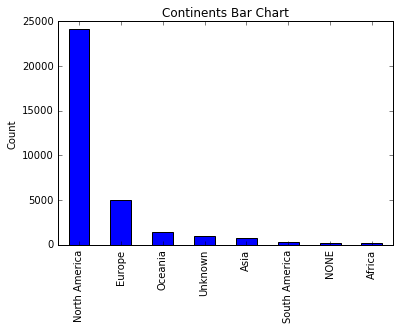

In [71]:
C=rs.Continent.value_counts().plot(kind = 'bar' )
C.set_title("Continents Bar Chart")
C.set_xlabel("")
C.set_ylabel("Count")

In [72]:
import seaborn as sn

In [73]:
from string import letters

In [74]:
Num_Var = list(rs.dtypes[rs.dtypes != "object"].index)

In [75]:
rs[Num_Var].head()

""
5
6
7
8
9


As per the assignment, my last name starts with D, so my dependent variable is EMPLOYMENT!

In [76]:
rs.Emp_Status.value_counts()

Employed full time                       14811
Student                                  12987
Not employed, but looking for work        2087
Freelance                                 1946
Not employed and not looking for work      682
None                                       151
Retired                                     85
Name: Emp_Status, dtype: int64

In [77]:
rs = rs[ -(rs.Emp_Status == 'none')] 
rs.shape

(32749, 13)

In [78]:
y=pd.DataFrame()
y['Emp_Status']=rs['Emp_Status']
y

,Emp_Status
5,Employed full time
6,Employed full time
7,"Not employed, but looking for work"
8,Employed full time
9,Freelance
10,Not employed and not looking for work
11,Employed full time
12,Employed full time
13,Student
14,Employed full time


In [79]:
rs.columns

Index([u'Gender', u'Age', u'Mari_Status', u'Emp_Status', u'Military_Service',
       u'Children_Under18', u'Education', u'Country', u'State', u'IncomeTaxes',
       u'like_CatsOrDogs', u'Cheese_You', u'Continent'],
      dtype='object')

In [80]:
y = y.replace(to_replace=['None','Employed full time', 'Student' , 'Not employed, but looking for work', 
                          'Freelance','Not employed and not looking for work','Retired' ], value=[0,1,2,3,4,5,6])

In [81]:
y = y.replace(to_replace=[0, 1, 2, 3,4,5 ], value=[5,6,7,8,9,0])

In [82]:
y.Emp_Status.value_counts()

6    14896
7    12987
8     2087
9     1946
0      682
5      151
Name: Emp_Status, dtype: int64

In [83]:
del rs["Cheese_You"]
del rs["Country"]
del rs["like_CatsOrDogs"]

In [84]:
rs.columns

Index([u'Gender', u'Age', u'Mari_Status', u'Emp_Status', u'Military_Service',
       u'Children_Under18', u'Education', u'State', u'IncomeTaxes',
       u'Continent'],
      dtype='object')

Part 2: Variables are most highly collinear and graph the results:

In [85]:
def describe_categorical(X):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))
    
describe_categorical(rs)

,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,State,IncomeTaxes,Continent
count,32749,32749,32749,32749,32749,32749,32749,20841,32749,32749
unique,3,8,6,7,2,3,8,52,9,8
top,Male,18-24,Single,Employed full time,No,No,Bachelor's degree,California,"Under $20,000",North America
freq,26415,15801,10428,14811,30526,27483,11042,3400,7891,24150


In [86]:
del rs["State"]

In [87]:
categorical_variables = ['Gender','Age','Mari_Status','Military_Service','Children_Under18','Education','IncomeTaxes',
                         'Continent']
for variable in categorical_variables:
    dummies = pd.get_dummies(rs[variable], prefix=variable)
    rs = pd.concat([rs, dummies], axis=1)
    rs.drop([variable], axis=1, inplace=True)

In [88]:
del rs['Emp_Status']
rs.columns

Index([u'Gender_Female', u'Gender_Male', u'Gender_None', u'Age_18-24',
       u'Age_25-34', u'Age_35-44', u'Age_45-54', u'Age_55-64',
       u'Age_65 or Above', u'Age_None', u'Age_Under 18',
       u'Mari_Status_Engaged', u'Mari_Status_Forever Alone',
       u'Mari_Status_In a relationship',
       u'Mari_Status_Married/civil union/domestic partnership',
       u'Mari_Status_Single', u'Mari_Status_Widowed', u'Military_Service_No',
       u'Military_Service_Yes', u'Children_Under18_No',
       u'Children_Under18_None', u'Children_Under18_Yes',
       u'Education_Associate degree', u'Education_Bachelor's degree',
       u'Education_Graduate or professional degree',
       u'Education_High school graduate or equivalent', u'Education_None',
       u'Education_Some college', u'Education_Some high school',
       u'Education_Trade or Vocational degree',
       u'IncomeTaxes_$100,000 - $149,999', u'IncomeTaxes_$150,000 or more',
       u'IncomeTaxes_$20,000 - $29,999', u'IncomeTaxes_$30,000 -

In [89]:
rs

,Gender_Female,Gender_Male,Gender_None,Age_18-24,Age_25-34,Age_35-44,Age_45-54,Age_55-64,Age_65 or Above,Age_None,...,"IncomeTaxes_Under $20,000",IncomeTaxes_none,Continent_Africa,Continent_Asia,Continent_Europe,Continent_NONE,Continent_North America,Continent_Oceania,Continent_South America,Continent_Unknown
5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


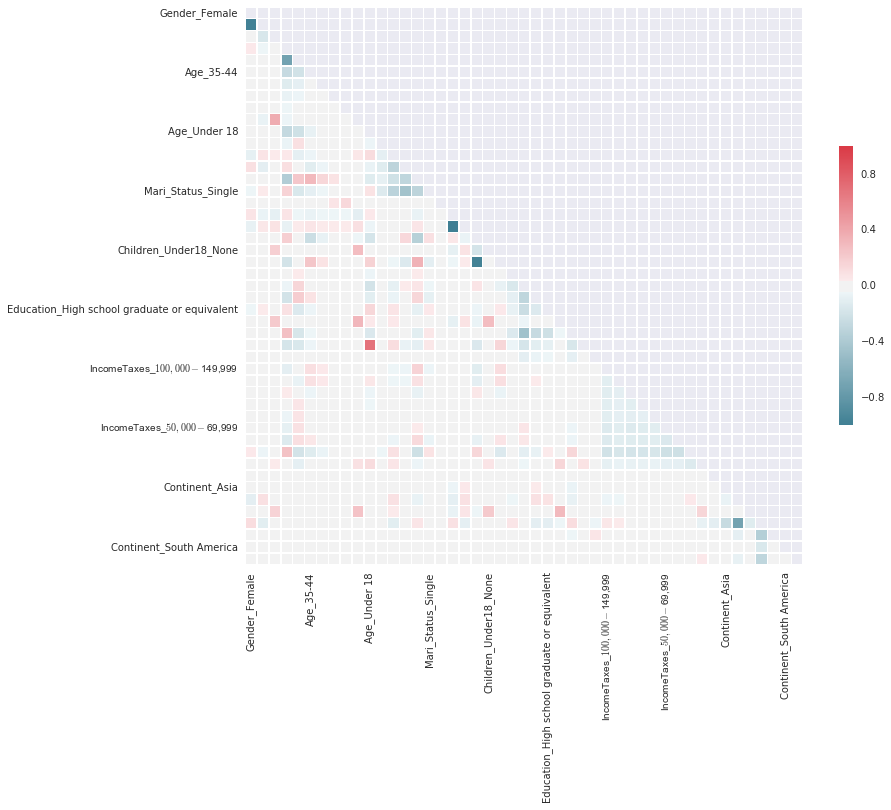

In [90]:
#plot the variables to understand which variables are highly collinear
import seaborn as sns 

#calculate the corelation matrix 
corr = rs.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,square=True, 
            xticklabels=5, yticklabels=5,linewidths=.5, 
            cbar_kws={"shrink": .5}, ax=ax)

In [91]:
x_train,x_test,x1_train,x1_test=train_test_split(rs,y,test_size=0.4)

In [92]:
x_train.shape

(19649, 47)

In [93]:
rs.columns
rs.dtypes

Gender_Female                                           float64
Gender_Male                                             float64
Gender_None                                             float64
Age_18-24                                               float64
Age_25-34                                               float64
Age_35-44                                               float64
Age_45-54                                               float64
Age_55-64                                               float64
Age_65 or Above                                         float64
Age_None                                                float64
Age_Under 18                                            float64
Mari_Status_Engaged                                     float64
Mari_Status_Forever Alone                               float64
Mari_Status_In a relationship                           float64
Mari_Status_Married/civil union/domestic partnership    float64
Mari_Status_Single                      

In [94]:
model = RandomForestClassifier(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(rs,y)

C:\Users\Ramya\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [95]:
#from sklearn.metrics import roc_auc_score
#roc = roc_auc_score(y, model.oob_score_)
#print "C-stat: ", roc_auc_score(y, model.oob_score_)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix




In [96]:
accuracy=accuracy_score(y,model.predict(rs))
print accuracy

0.780542917341


In [97]:
print classification_report(y,model.predict(rs))

             precision    recall  f1-score   support

          0       0.74      0.33      0.46       682
          5       0.99      0.60      0.75       151
          6       0.81      0.86      0.84     14896
          7       0.75      0.90      0.81     12987
          8       0.72      0.17      0.28      2087
          9       0.82      0.24      0.37      1946

avg / total       0.78      0.78      0.76     32749



In [98]:
print confusion_matrix(y,model.predict(rs))

[[  228     0   176   254    15     9]
 [    0    91    32    26     0     2]
 [   30     0 12787  1978    55    46]
 [   21     1  1256 11640    49    20]
 [   15     0   618  1074   358    22]
 [   15     0   833   617    23   458]]
